<a href="https://colab.research.google.com/github/data-better/DeepS/blob/master/%EC%A0%9C10%EC%9E%A5_CIFAR_10_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  CIFAR-10 분류

* Tensorflow 버전 검토

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, optimizers
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

### CIFAR-10 데이터를 읽고 그래프로 살펴보기


In [ ]:
cifar10 = datasets.cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
print('train: x=%s, y=%s' % (train_x.shape, train_y.shape))
print('test : x=%s, y=%s' % (test_x.shape,  test_y.shape))

170500096/170498071 [==============================] - 6s 0us/step
train: x=(50000, 32, 32, 3), y=(50000, 1)
test : x=(10000, 32, 32, 3), y=(10000, 1)


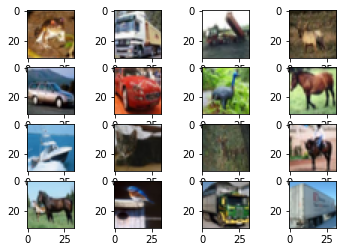

In [ ]:
import matplotlib.pyplot as plt
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1])
plt.show()

### 합성곱 신경망 

In [ ]:
train_x = train_x / 255.0
test_x  = test_x / 255.0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

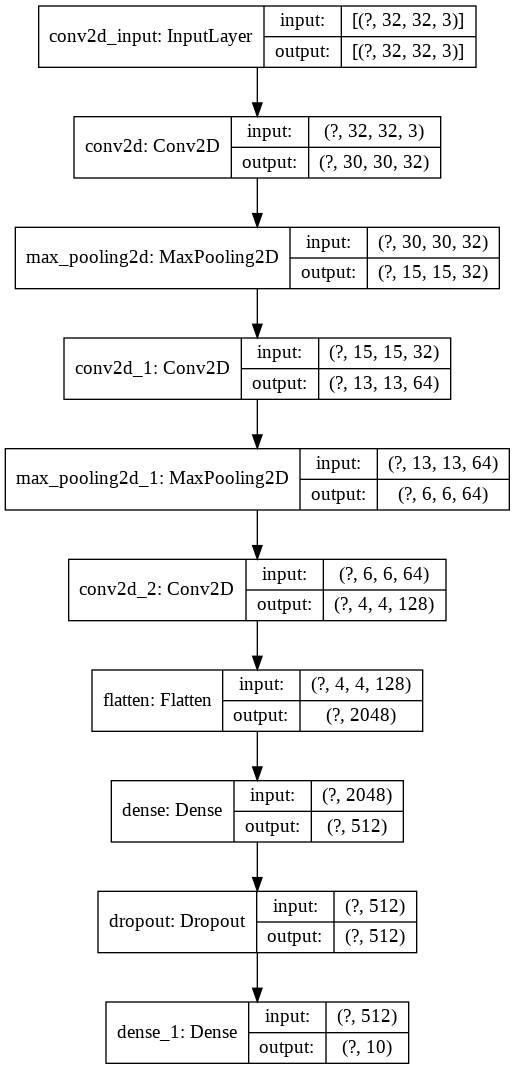

In [ ]:
model3 = models.Sequential([
  Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation="relu"),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3), filters=64, activation="relu"),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3), filters=128, activation="relu"),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])
model3.summary()
plot_model(model3, to_file="model3_cifar10.png", show_shapes=True)

In [ ]:
model3.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(train_x, train_y, epochs=25, batch_size=256, validation_split=0.25)

Epoch 1/25
147/147 [==============================] - 2s 13ms/step - loss: 1.7183 - accuracy: 0.3685 - val_loss: 1.4398 - val_accuracy: 0.4816
Epoch 2/25
147/147 [==============================] - 1s 10ms/step - loss: 1.3592 - accuracy: 0.5105 - val_loss: 1.2725 - val_accuracy: 0.5526
Epoch 3/25
147/147 [==============================] - 1s 10ms/step - loss: 1.2101 - accuracy: 0.5679 - val_loss: 1.1424 - val_accuracy: 0.6019
Epoch 4/25
147/147 [==============================] - 1s 10ms/step - loss: 1.0953 - accuracy: 0.6138 - val_loss: 1.1216 - val_accuracy: 0.6126
Epoch 5/25
147/147 [==============================] - 1s 10ms/step - loss: 1.0026 - accuracy: 0.6494 - val_loss: 1.0284 - val_accuracy: 0.6385
Epoch 6/25
147/147 [==============================] - 1s 10ms/step - loss: 0.9299 - accuracy: 0.6741 - val_loss: 0.9803 - val_accuracy: 0.6598
Epoch 7/25
147/147 [==============================] - 1s 10ms/step - loss: 0.8510 - accuracy: 0.7005 - val_loss: 0.9500 - val_accuracy: 0.6702

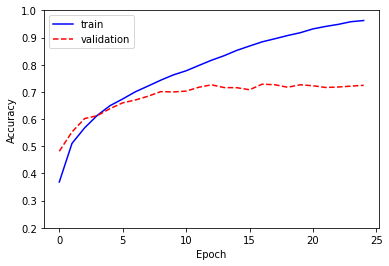

In [ ]:
plt.plot(hist3.history['accuracy'], 'b-')
plt.plot(hist3.history['val_accuracy'], 'r--')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.2,1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
sc3 = model3.evaluate(test_x, test_y)
print("accuracy : ", sc3[1], "  loss : ", sc3[0])

313/313 [==============================] - 1s 2ms/step - loss: 1.2737 - accuracy: 0.7199
accuracy :  0.7199000120162964   loss :  1.2736802101135254


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         7

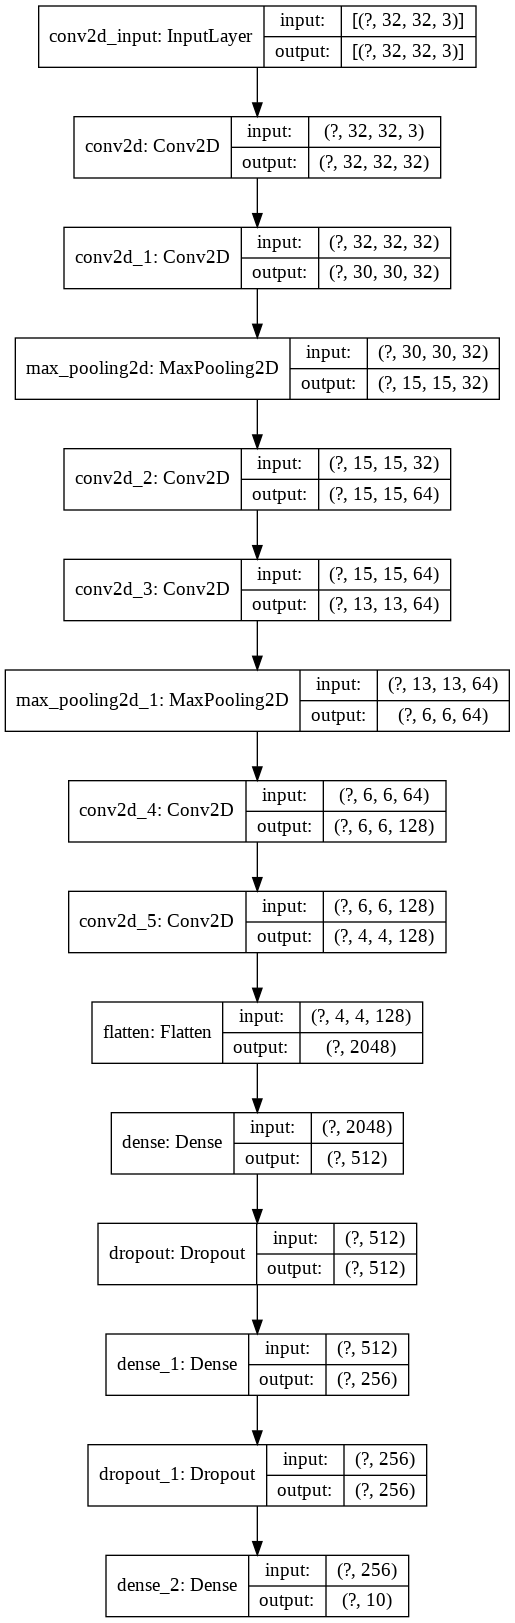

In [ ]:
model4 = models.Sequential([
  Conv2D(input_shape=(32,32,3), kernel_size=(3,3), padding='same', 
         filters=32, activation="relu"),
  Conv2D(kernel_size=(3,3),  filters=32, activation="relu"),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3),  padding='same',filters=64, activation="relu"),
  Conv2D(kernel_size=(3,3),  filters=64, activation="relu"),
  MaxPool2D(),
  Conv2D(kernel_size=(3,3),  padding='same', filters=128, activation="relu"),
  Conv2D(kernel_size=(3,3),  filters=128, activation="relu"),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(256, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])
model4.summary()
plot_model(model4, to_file="model4_cifar10.png", show_shapes=True)

In [ ]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist4 = model4.fit(train_x, train_y, epochs=25, batch_size=256,
               validation_split=0.25)

Epoch 1/25
147/147 [==============================] - 4s 25ms/step - loss: 0.1049 - accuracy: 0.9641 - val_loss: 1.3734 - val_accuracy: 0.7589
Epoch 2/25
147/147 [==============================] - 3s 23ms/step - loss: 0.1106 - accuracy: 0.9650 - val_loss: 1.2565 - val_accuracy: 0.7610
Epoch 3/25
147/147 [==============================] - 3s 24ms/step - loss: 0.0854 - accuracy: 0.9716 - val_loss: 1.3326 - val_accuracy: 0.7606
Epoch 4/25
147/147 [==============================] - 3s 23ms/step - loss: 0.0905 - accuracy: 0.9713 - val_loss: 1.3329 - val_accuracy: 0.7693
Epoch 5/25
147/147 [==============================] - 3s 23ms/step - loss: 0.0782 - accuracy: 0.9746 - val_loss: 1.4044 - val_accuracy: 0.7590
Epoch 6/25
147/147 [==============================] - 3s 23ms/step - loss: 0.0878 - accuracy: 0.9714 - val_loss: 1.3759 - val_accuracy: 0.7648
Epoch 7/25
147/147 [==============================] - 3s 23ms/step - loss: 0.0744 - accuracy: 0.9757 - val_loss: 1.3829 - val_accuracy: 0.7634

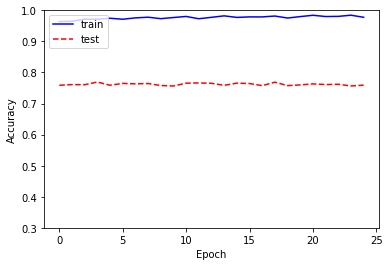

313/313 [==============================] - 1s 3ms/step - loss: 1.5444 - accuracy: 0.7556
accuracy :  0.7555999755859375   loss :  1.5443753004074097


In [ ]:
plt.plot(hist4.history['accuracy'], 'b-')
plt.plot(hist4.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.3,1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc4 = model4.evaluate(test_x, test_y)
print("accuracy : ", sc4[1], "  loss : ", sc4[0])